110164.59496336569


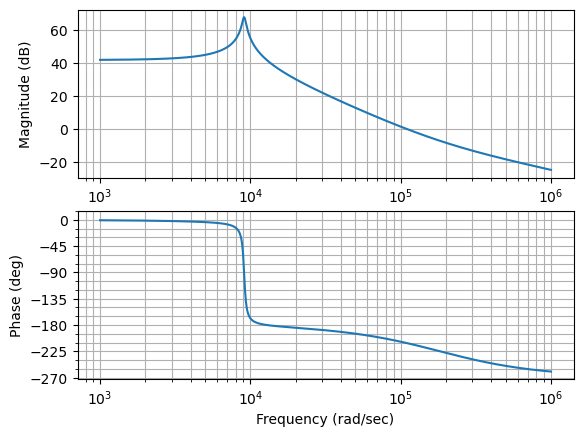

In [50]:
# 0db 주파수 구하기

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control as co

R, L, C = 1000, 220e-6, 2.2e-6
D = 0.8
Vin = 5
Vof = Vin / (1 - D)
ILf = Vof / R / (1 - D)

G = co.tf([-ILf * L, (1 - D) * Vof], [L * C, L / R, (1 - D) ** 2])

mag, phase, omega = co.bode(G, dB=True)

M_margin_min = 1e15
w_0db = -1
for M, phi, w in zip(mag, phase, omega):
  if np.abs(M - 1) < M_margin_min:
    M_margin_min = abs(M - 1)
    w_0db = w

print(w_0db)


9.503168476884677e-08 9.50316847688468e-09 3.7984012212539516e-10 210000.0 1330.3064688512393 839.3666369312012


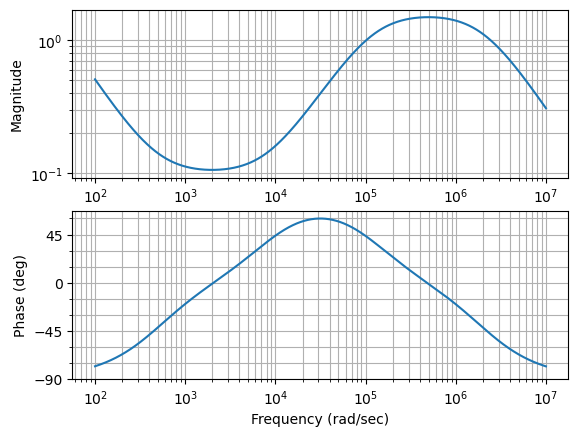

In [53]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control as co

# C1, C2, C3, R1, R2, R3 = \
#   np.array([
#     3.3e-6, 3.3e-8, 3.3e-8, \
#     3.3e+2, 3.3e+2, 3.3e+2
#   ])

fp0, fz1, fz2, fp1, fp2 = \
  10 ** 0.9, 10 ** 1.9, 10 ** 3.1, 10 ** 4.3, 10 ** 5.5
R1 = 2.1e+5

C1, C2, C3, R2, R3 = \
  (fp2 - fz2) / (2 * np.pi * R1 * fp0 * fp2), \
  (fp1 - fz1) / (2 * np.pi * R1 * fp1 * fz1), \
  fz2 / (2 * np.pi * R1 * fp0 * fp2), \
  R1 * fp0 * fp2 / ((fp2 - fz2) * fz2), \
  R1 * fz1 / (fp1 - fz1)

print(C1, C2, C3, R1, R2, R3)

Gc = co.tf([C2 * (R1 + R3), 1], [1]) \
  * co.tf([C1 * R2, 1], [1]) \
  / co.tf([R1, 0], [1]) \
  / co.tf([C2 * R3, 1], [1]) \
  / co.tf([C1 * C3 * R2, C1 + C3], [1])

mag, phase, omega = co.bode(Gc)

# fz1 = 1 / (2 * np.pi * (R1 + R2) * C2)
# fz2 = 1 / (2 * np.pi * R2 * C1)
# fp1 = 1 / (2 * np.pi * R3 * C2)
# fp2 = 1 / (2 * np.pi * R2) * (1 / C1 + 1 / C2)

# print(fz1, fz2, fp1, fp2)


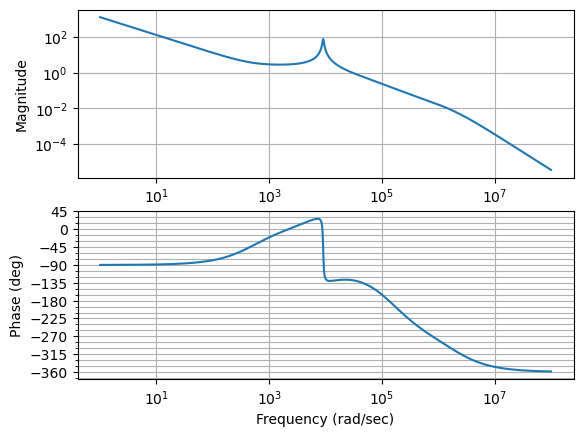

In [54]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control as co

Vp = 5 
GH = G * Gc / Vp

mag, phase, omega = co.bode(GH, omega=np.logspace(0, 8, 1000))

In [55]:
print(R, L, C)
print(C1, C2, C3, R1, R2, R3)
print(fp0, fz1, fz2, fp1, fp2)

1000 0.00022 2.2e-06
9.503168476884677e-08 9.50316847688468e-09 3.7984012212539516e-10 210000.0 1330.3064688512393 839.3666369312012
7.943282347242816 79.43282347242814 1258.9254117941675 19952.62314968879 316227.7660168379
